### Generating hand written digits

After learning from MNIST, using GAN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

from torch.autograd import Variable
from torchvision import datasets
from torchvision import utils

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
bs = 6000
img_height = 28  # Square 
# Learning rate
lr = 1e-3
num_epochs = 250

In [3]:
# Fetch the data, and prepare the dataset and dataloader
trans = transforms.Compose([transforms.ToTensor(),])
dataset = datasets.MNIST('/home/as/datasets/pytorch.mnist', transform=trans, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=4, pin_memory=True)

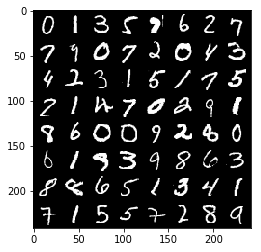

In [4]:
# Let's see some images

imgs, lables = next(iter(dataloader))
grid = utils.make_grid(imgs[:64])
grid = grid.numpy().transpose((1, 2, 0))
plt.imshow(grid)

In [5]:
# Constants

# Dimensions for random noise
z_dim = 100

# Dimensions for Generator
G_in, G_hidden, G_out = 100, 128, 784  # 784 is 28 * 28, dimensions of an MNIST digit

# Dimensions for Discrimininator
D_in, D_hidden, D_out = 784, 128, 1  # 784 is 28 * 28, dimensions of an MNIST digit

In [6]:
class TwoLayerNet(nn.Module):
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(dim_in, dim_hidden, bias=True)
        self.linear2 = nn.Linear(dim_hidden, dim_out, bias=True)
        
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.sigmoid(x)
        return x
    
G = TwoLayerNet(G_in, G_hidden, G_out).cuda()
D = TwoLayerNet(D_in, D_hidden, D_out).cuda()

In [7]:
optim_D = optim.Adam(D.parameters(), lr=lr)
optim_G = optim.Adam(G.parameters(), lr=lr)

In [8]:
d_loss_trend = list()
g_loss_trend = list()

for n in range(num_epochs):
    
    for batch_num, data in enumerate(dataloader):
        
        # Discriminator ==
        imgs = Variable(data[0]).cuda()
        loop_bs = len(imgs)
        x = imgs.resize(loop_bs, img_height*img_height)  # torch.Size([64, 784])
        z = Variable(torch.randn(loop_bs, G_in)).cuda()  # torch.Size([64, 100])
        G_output = G(z)
        D_output_real = D(x)
        D_output_fake = D(G_output)
        
        # print(D_real.data.shape)                  # torch.Size([64, 1])
        # print(D_fake.data.shape)                  # torch.Size([64, 1])
        # print(G_output.data.shape)                # torch.Size([64, 784])
        
        D_loss = -torch.mean(torch.log(D_output_real) + torch.log(1. - D_output_fake))
        d_loss_trend.append(D_loss)
        D_loss.backward()
        optim_D.step()
        
        # Reset
        optim_D.zero_grad()
        optim_G.zero_grad()
        
        
        # Generator ==
        z = Variable(torch.randn(loop_bs, G_in)).cuda()
        G_output = G(z)
        D_output_fake = D(G_output)
       
        G_loss = -torch.mean(torch.log(D_output_fake))
        g_loss_trend.append(G_loss)
        G_loss.backward()
        optim_G.step()    
        
        # Reset
        optim_D.zero_grad()
        optim_G.zero_grad()
        
        
        
    print('Epoch', n, 'done.')

Epoch 0 done.
Epoch 1 done.
Epoch 2 done.
Epoch 3 done.
Epoch 4 done.
Epoch 5 done.
Epoch 6 done.
Epoch 7 done.
Epoch 8 done.
Epoch 9 done.
Epoch 10 done.
Epoch 11 done.
Epoch 12 done.
Epoch 13 done.
Epoch 14 done.
Epoch 15 done.
Epoch 16 done.
Epoch 17 done.
Epoch 18 done.
Epoch 19 done.
Epoch 20 done.
Epoch 21 done.
Epoch 22 done.
Epoch 23 done.
Epoch 24 done.
Epoch 25 done.
Epoch 26 done.
Epoch 27 done.
Epoch 28 done.
Epoch 29 done.
Epoch 30 done.
Epoch 31 done.
Epoch 32 done.
Epoch 33 done.
Epoch 34 done.
Epoch 35 done.
Epoch 36 done.
Epoch 37 done.
Epoch 38 done.
Epoch 39 done.
Epoch 40 done.
Epoch 41 done.
Epoch 42 done.
Epoch 43 done.
Epoch 44 done.
Epoch 45 done.
Epoch 46 done.
Epoch 47 done.
Epoch 48 done.
Epoch 49 done.
Epoch 50 done.
Epoch 51 done.
Epoch 52 done.
Epoch 53 done.
Epoch 54 done.
Epoch 55 done.
Epoch 56 done.
Epoch 57 done.
Epoch 58 done.
Epoch 59 done.
Epoch 60 done.
Epoch 61 done.
Epoch 62 done.
Epoch 63 done.
Epoch 64 done.
Epoch 65 done.
Epoch 66 done.
Epoch

Text(0.5,1,'Discriminator loss')

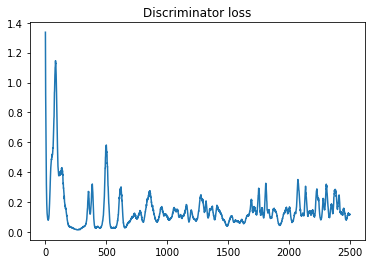

In [40]:
dl = []
for d in d_loss_trend[:2500]:
    dl.append(d.cpu().data.numpy()[0])

plt.plot(dl)
plt.title('Discriminator loss')

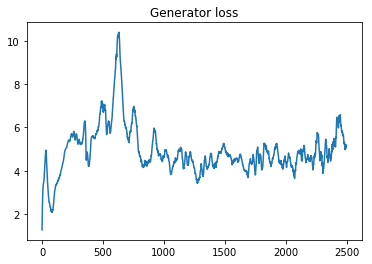

In [41]:
gl = []
for g in g_loss_trend[:2500]:
    gl.append(g.cpu().data.numpy()[0])

plt.title('Generator loss')
plt.plot(gl)

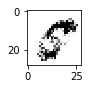

In [105]:
z = Variable(torch.randn(1, 100)).cuda()
G_output = G(z)
G_output.data.shape
img = G_output.data.cpu().numpy()[0]
img2 = img.reshape(28, 28)

fig = plt.figure(figsize=(1, 1))
plt.imshow(img2, cmap='Greys')